# RNN - recursive neural network

## Predicting close price of BOEING COMPANY

__Company:__ The dataset pertains to The Boeing Company, often referred to simply as Boeing.

__Exchange:__ Boeing's stock ('BA') is traded on the New York Stock Exchange (NYSE).

__Time Period:__ The dataset covers a significant time span, from January 1, 2014, to January 1, 2024. This 10-year period provides a comprehensive view of the company's stock performance over time, encompassing various market conditions, economic cycles, and company-specific events.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

### Downloading data

In [2]:
stock_symbol = 'BA'  #Boeing Company
start_date = '2014-01-01'
end_date = '2024-01-01'

data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


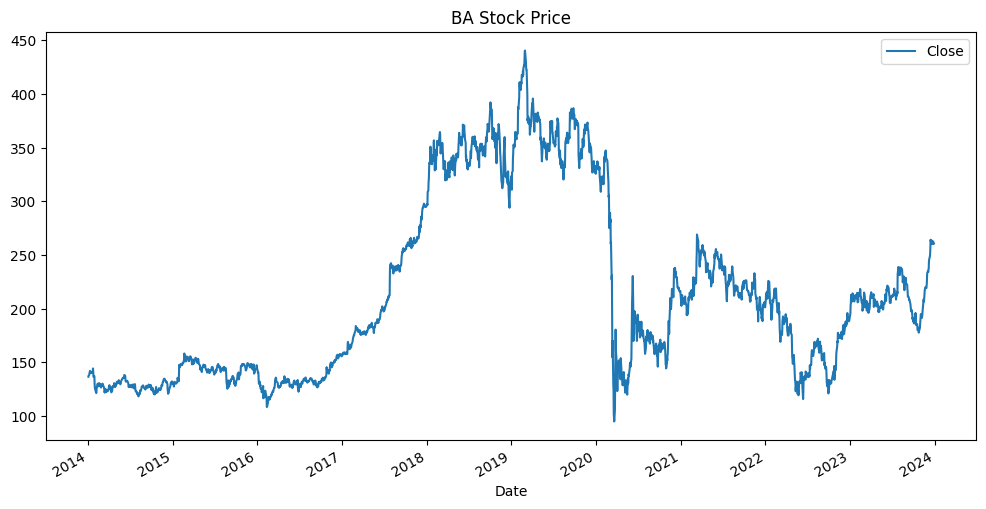

In [3]:
data[['Close']].plot(figsize=(12, 6), title=f'{stock_symbol} Stock Price')
plt.show()

Missing Values:
Close    0
dtype: int64
                 Close
Date                  
2014-01-02  136.669998
2014-01-03  137.619995
2014-01-06  138.410004
2014-01-07  140.509995
2014-01-08  140.820007


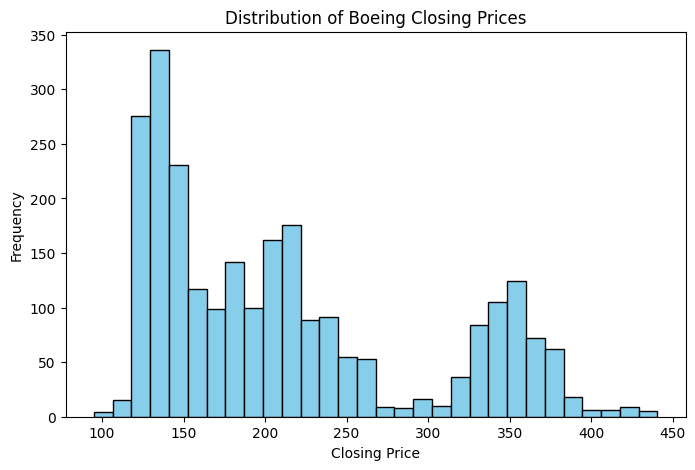

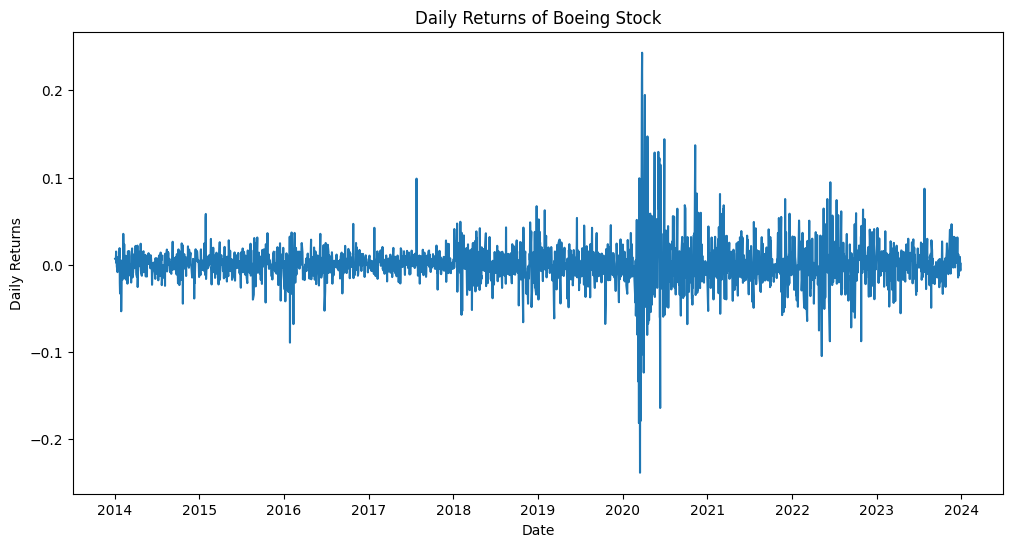

Summary Statistics:
             Close
count  2516.000000
mean    212.944118
std      83.500886
min      95.010002
25%     141.037495
50%     190.530006
75%     255.654995
max     440.619995


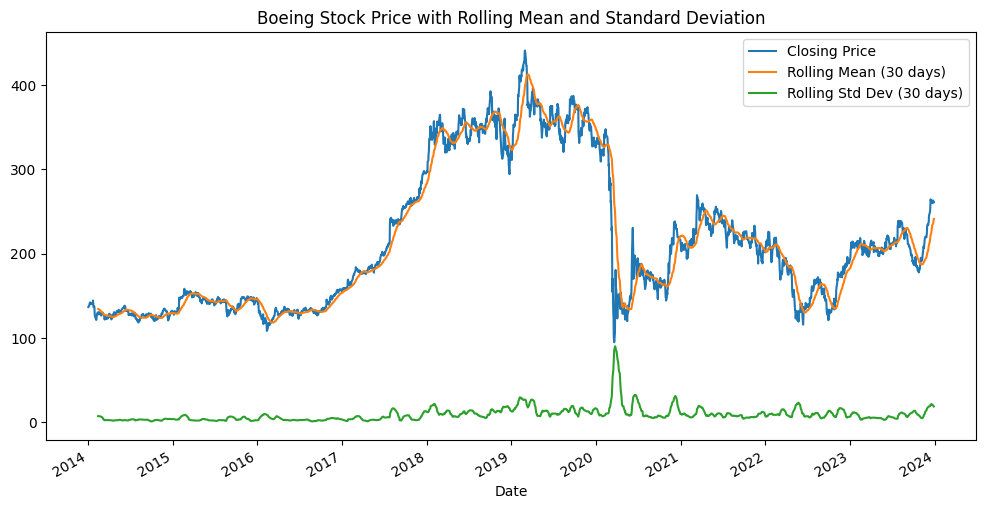

In [4]:
df = data[['Close']]
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

print(df.head())

plt.figure(figsize=(8, 5))
plt.hist(df['Close'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Boeing Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

daily_returns = df['Close'].pct_change().dropna()
plt.figure(figsize=(12, 6))
plt.plot(daily_returns)
plt.title('Daily Returns of Boeing Stock')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.show()

print("Summary Statistics:")
print(df.describe())

rolling_window = 30
plt.figure(figsize=(12, 6))
df['Close'].plot(label='Closing Price')
df['Close'].rolling(window=rolling_window).mean().plot(label=f'Rolling Mean ({rolling_window} days)')
df['Close'].rolling(window=rolling_window).std().plot(label=f'Rolling Std Dev ({rolling_window} days)')
plt.title('Boeing Stock Price with Rolling Mean and Standard Deviation')
plt.legend()
plt.show()

### As we can see we have no missing values.

### Scalling data

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

### Volatility Analysis

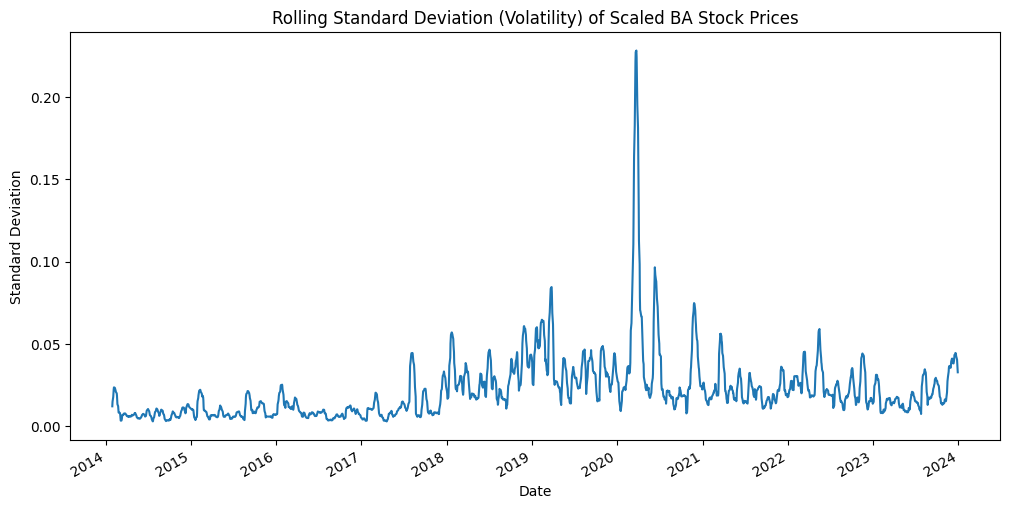

In [6]:
df_scaled_ = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)

window_size = 20
df_scaled_['Rolling_Std'] = df_scaled_['Close'].rolling(window=window_size).std()

plt.figure(figsize=(12, 6))
df_scaled_['Rolling_Std'].plot()
plt.title('Rolling Standard Deviation (Volatility) of Scaled BA Stock Prices')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.show()

In [7]:
df_scaled.shape

(2516, 1)

## Comparing models

### We will train models on data divided into sequences of 20 observations and 21st observation is the target.
### Train sample is 80% of the whole dataset and test sample is the remaining 20%.

In [8]:
sequence_length = 20

data_x = []
data_y = []

for i in range(len(df_scaled) - sequence_length):
    data_x.append(df_scaled[i:i+sequence_length])
    data_y.append(df_scaled[i+sequence_length])

data_x = np.array(data_x)
data_y = np.array(data_y)

train_size = int(len(data_x) * 0.80)
train_x, test_x = data_x[:train_size], data_x[train_size:]
train_y, test_y = data_y[:train_size], data_y[train_size:]

C:\Users\kacpe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0377
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.7904e-04
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0549e-04
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.1041e-04
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4906e-04
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7904e-04
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3959e-04
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2108e-04
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4196e-04
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1094e-04
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4377e-04
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2489e-04
Epoch 13/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8227e-04
Epoch 14/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5813e-04
Epoch 15/50
63/63 ━━━━━━━━━━━━━━━

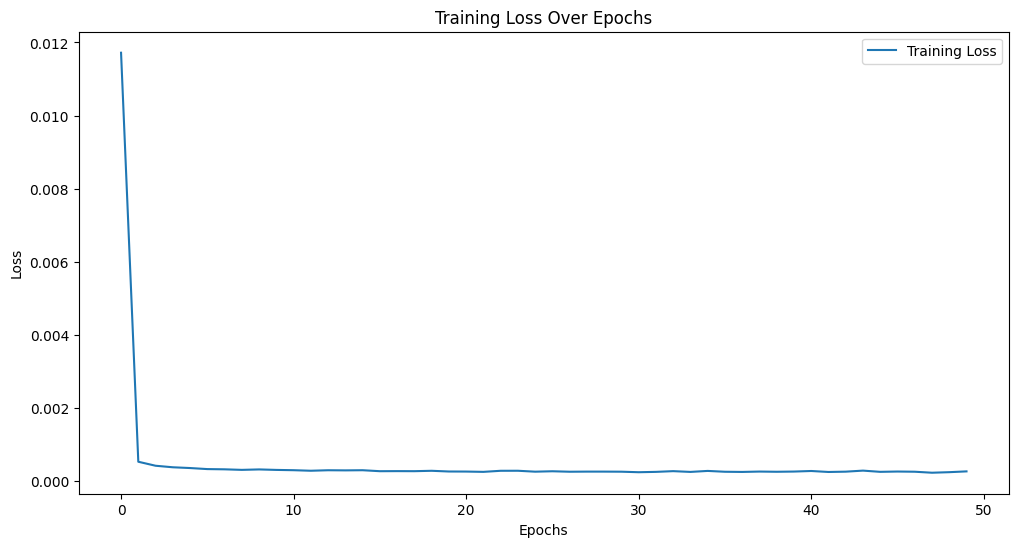

In [9]:
#Simple RNN
model1= Sequential()

model1.add(SimpleRNN(32, input_shape=(sequence_length, 1)))
model1.add(Dense(1))

model1.compile(optimizer='adam', loss='mean_squared_error')
#model1.fit(train_x, train_y, epochs=50, batch_size=32)

history1 = model1.fit(train_x, train_y, epochs=50, batch_size=32)

plt.figure(figsize=(12, 6))
plt.plot(history1.history['loss'], label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0543
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0013 
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010   
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.5005e-04
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.2453e-04
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.6467e-04
Epoch 13/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.5545e-04
Epoch 14/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.1615e-04
Epoch 15/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6

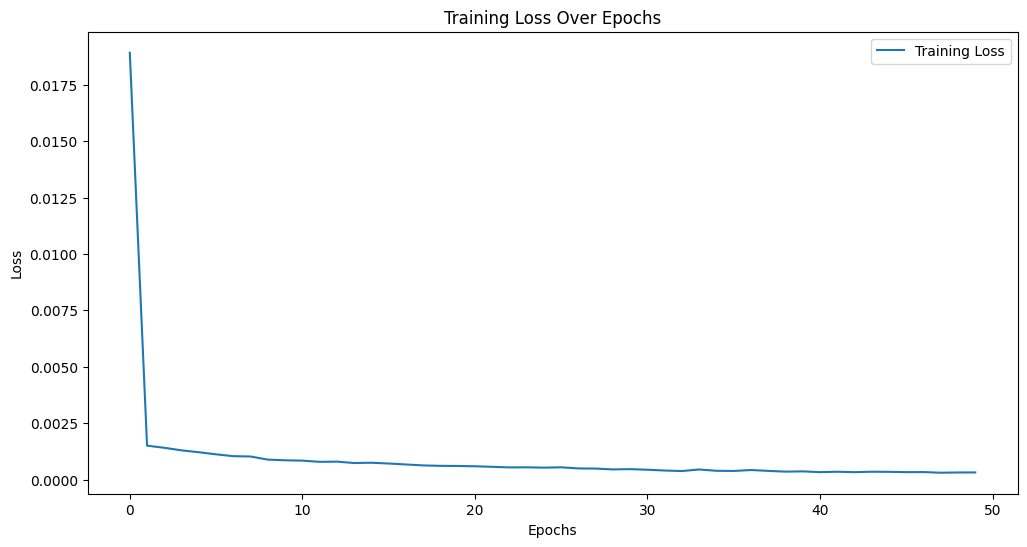

In [10]:
#LSTM
model2= Sequential()

model2.add(LSTM(50, input_shape=(sequence_length, 1)))
model2.add(Dense(1))

model2.compile(optimizer='adam', loss='mean_squared_error')
#model2.fit(train_x, train_y, epochs=50, batch_size=32)

history2 = model2.fit(train_x, train_y, epochs=50, batch_size=32)

plt.figure(figsize=(12, 6))
plt.plot(history2.history['loss'], label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1013
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.4369e-04
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1071e-04
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.3852e-04
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.1238e-04
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.7138e-04
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.5055e-04
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.4597e-04
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6120e-04
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4656e-04
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.9508e-04
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.0175e-04
Epoch 13/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.4107e-04
Epoch 14/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.2268e-04
Epoch 15/50
63/63 ━━━━━━━━━━

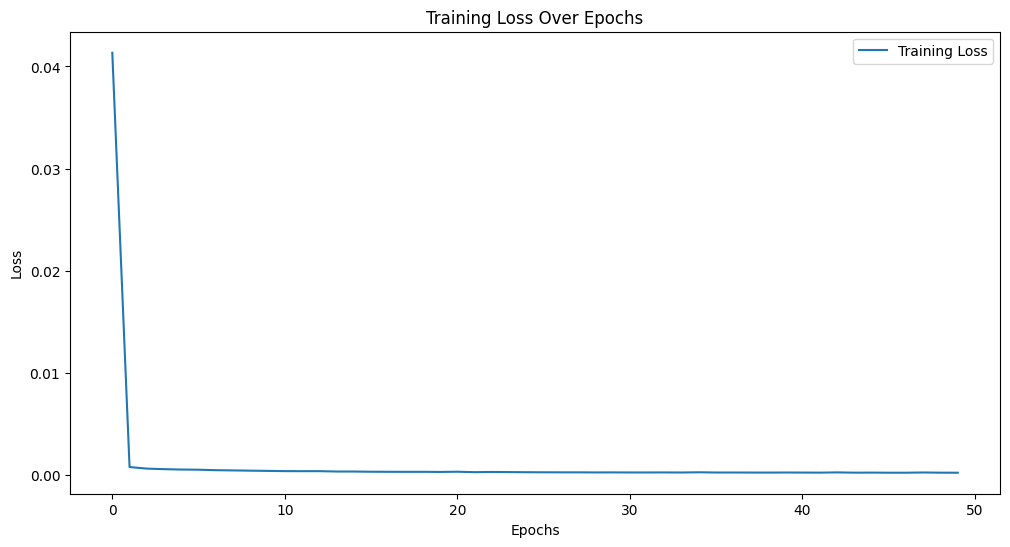

In [11]:
#Simple GRU
model3= Sequential()

model3.add(GRU(50, input_shape=(sequence_length, 1)))
model3.add(Dense(1))

model3.compile(optimizer='adam', loss='mean_squared_error')
#model3.fit(train_x, train_y, epochs=50, batch_size=32)

history3 = model3.fit(train_x, train_y, epochs=50, batch_size=32)

plt.figure(figsize=(12, 6))
plt.plot(history3.history['loss'], label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
SimpleRNN Model Metrics:
Mean Squared Error (Test): 18.79
Mean Absolute Error (Test): 3.24


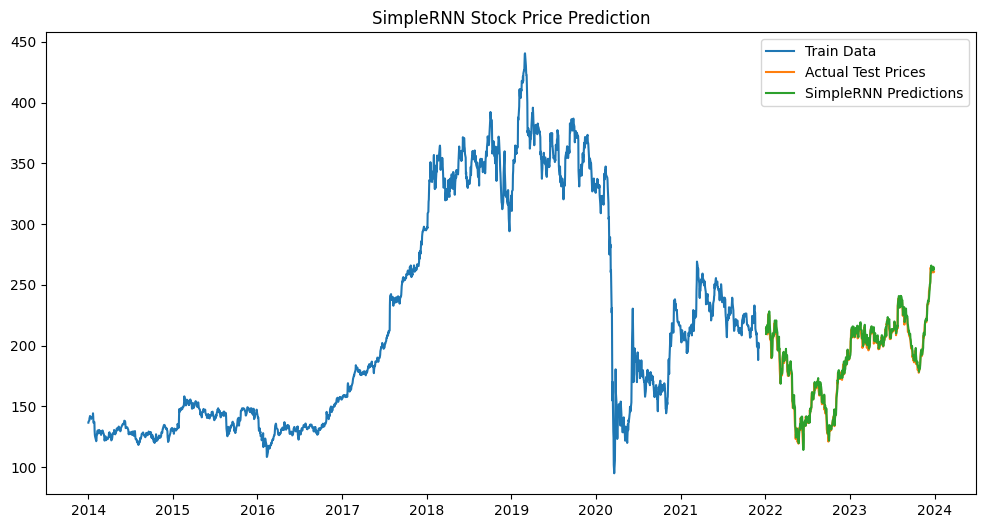

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
LSTM Model Metrics:
Mean Squared Error (Test): 23.85
Mean Absolute Error (Test): 3.74


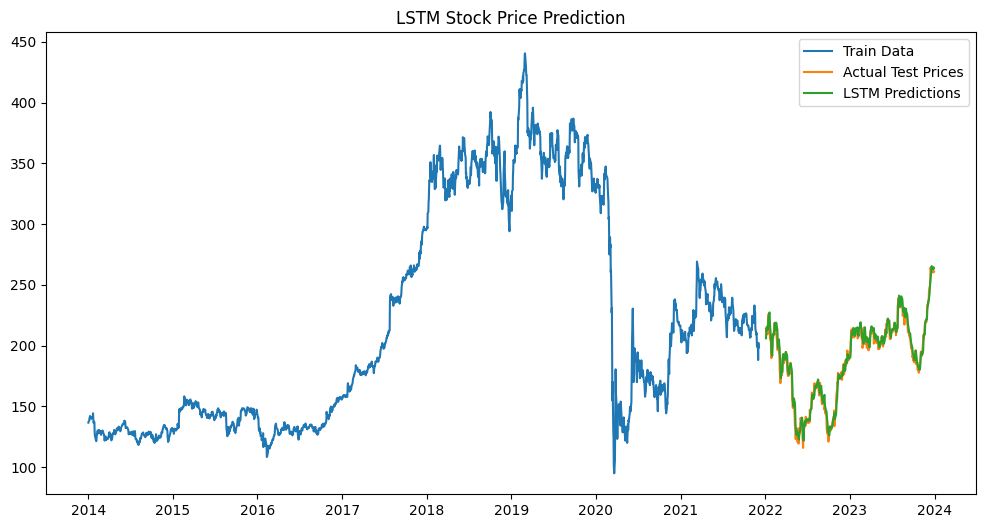

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
GRU Model Metrics:
Mean Squared Error (Test): 20.38
Mean Absolute Error (Test): 3.40


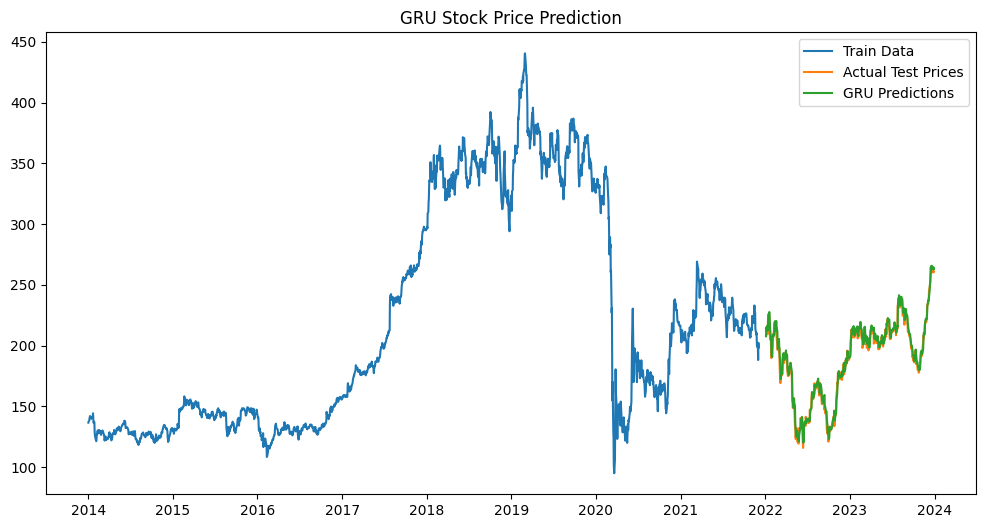

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_model(model, model_name):
   
    predictions_test = model.predict(test_x)
    #inverting scaling
    predictions_test = scaler.inverse_transform(predictions_test)
    actual_prices = scaler.inverse_transform(test_y.reshape(-1, 1))

    mse_test = mean_squared_error(actual_prices, predictions_test)
    mae_test = mean_absolute_error(actual_prices, predictions_test)

    print(f'{model_name} Model Metrics:')
    print(f'Mean Squared Error (Test): {mse_test:.2f}')
    print(f'Mean Absolute Error (Test): {mae_test:.2f}')
    
    plt.figure(figsize=(12, 6))
    plt.plot(df.index[:len(train_x)], df['Close'][:len(train_x)], label='Train Data')
    plt.plot(df.index[len(train_x) + sequence_length:], actual_prices, label='Actual Test Prices')
    plt.plot(df.index[len(train_x) + sequence_length:], predictions_test, label=f'{model_name} Predictions')
    plt.title(f'{model_name} Stock Price Prediction')
    plt.legend()
    plt.show()

evaluate_model(model1, 'SimpleRNN')
evaluate_model(model2, 'LSTM')
evaluate_model(model3, 'GRU')

## Changing parameters, layers etc

Epoch 1/100


C:\Users\kacpe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0178 - val_loss: 6.9449e-04
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0022 - val_loss: 8.6712e-04
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - val_loss: 6.2201e-04
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - val_loss: 6.1257e-04
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.4945e-04 - val_loss: 8.8906e-04
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012 - val_loss: 7.7864e-04
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.8564e-04 - val_loss: 5.3598e-04
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.7982e-04 - val_loss: 4.9940e-04
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0010 - val_loss: 4.2319e-04
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.2196e-04 - val_loss: 5.7139e

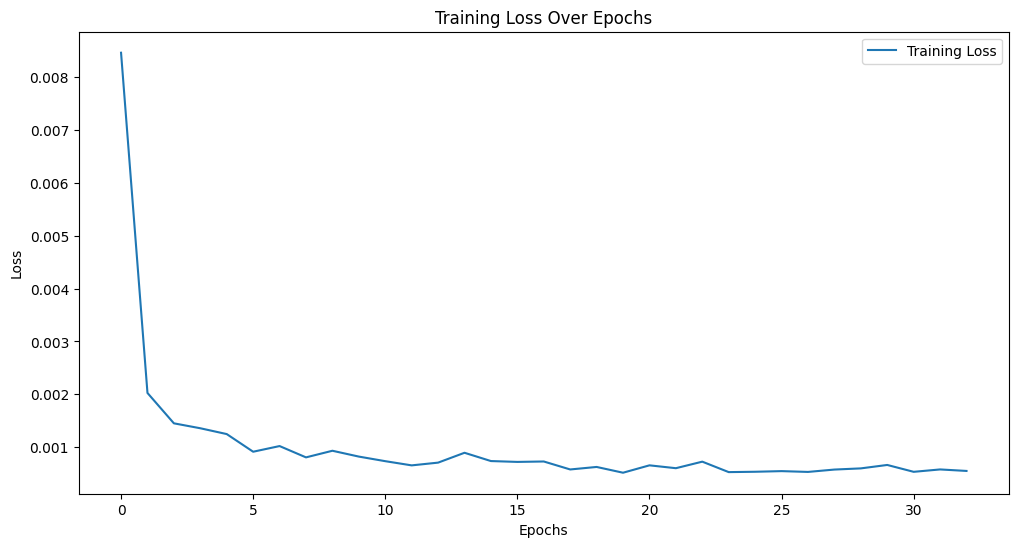

In [38]:
model1_modified = Sequential()

model1_modified.add(SimpleRNN(64, input_shape=(sequence_length, 1), return_sequences=True))
model1_modified.add(Dropout(0.2))
model1_modified.add(SimpleRNN(32, return_sequences=False))
model1_modified.add(Dense(1))

adam_optimizer = Adam(learning_rate=0.001)

model1_modified.compile(optimizer=adam_optimizer, loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history1_modified = model1_modified.fit(train_x, train_y, epochs=100, batch_size=16, callbacks=[early_stopping], validation_split=0.2)


plt.figure(figsize=(12, 6))
plt.plot(history1_modified.history['loss'], label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
SimpleRNN Model Metrics:
Mean Squared Error (Test): 21.82
Mean Absolute Error (Test): 3.58


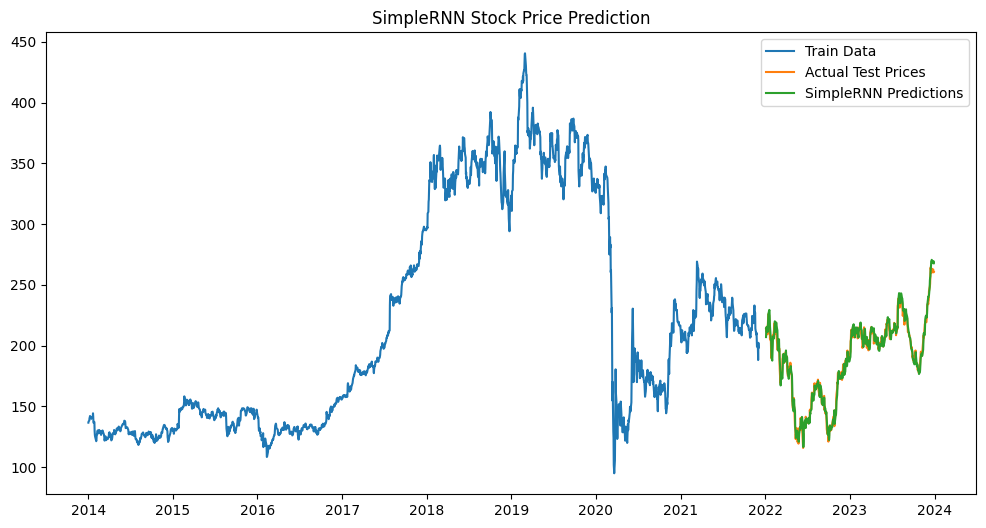

In [39]:
evaluate_model(model1_modified, 'SimpleRNN')

Epoch 1/100


C:\Users\kacpe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0249 - val_loss: 0.0014
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0012 - val_loss: 9.8232e-04
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0012 - val_loss: 9.4559e-04
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0011 - val_loss: 9.2585e-04
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0011 - val_loss: 9.2455e-04
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 8.9233e-04 - val_loss: 7.6451e-04
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0012 - val_loss: 7.5172e-04
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 9.5360e-04 - val_loss: 6.7661e-04
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 7.1485e-04 - val_loss: 7.4438e-0

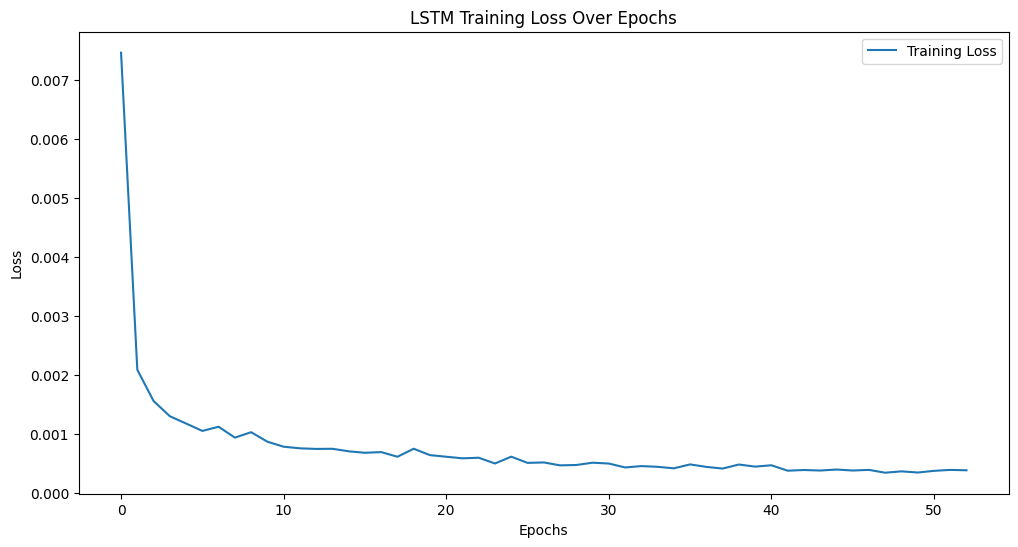

In [48]:
model_lstm = Sequential()

model_lstm.add(LSTM(64, input_shape=(sequence_length, 1), return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(32, return_sequences=False))
model_lstm.add(Dense(1))

adam_optimizer = Adam(learning_rate=0.001)

model_lstm.compile(optimizer=adam_optimizer, loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history_lstm = model_lstm.fit(train_x, train_y, epochs=100, batch_size=8, callbacks=[early_stopping], validation_split=0.2)

plt.figure(figsize=(12, 6))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.title('LSTM Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
LSTM Model Metrics:
Mean Squared Error (Test): 25.18
Mean Absolute Error (Test): 3.81


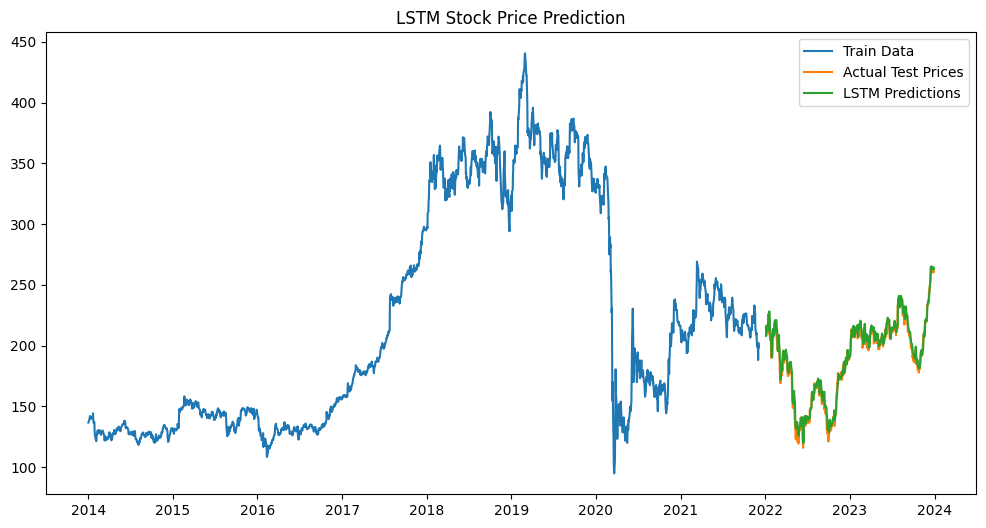

In [49]:
evaluate_model(model_lstm, 'LSTM')

Epoch 1/100


C:\Users\kacpe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.0183 - val_loss: 6.6051e-04
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0013 - val_loss: 8.8644e-04
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0011 - val_loss: 5.5954e-04
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 8.6558e-04 - val_loss: 5.3734e-04
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 8.4396e-04 - val_loss: 5.3468e-04
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 6.9761e-04 - val_loss: 4.6367e-04
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 7.1854e-04 - val_loss: 6.7561e-04
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 7.2916e-04 - val_loss: 4.2630e-04
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 5.8664e-04 - val_loss: 4.3920e-04
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 6.1984e-04 - val_loss: 4.3097e-04
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 

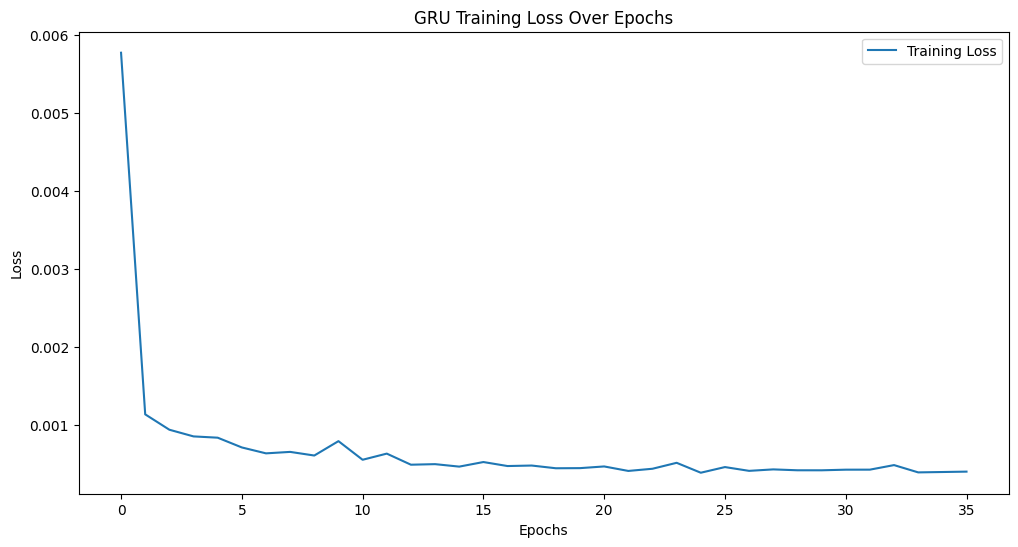

In [50]:
model_gru = Sequential()

model_gru.add(GRU(64, input_shape=(sequence_length, 1), return_sequences=True))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(32, return_sequences=False))
model_gru.add(Dense(1))

adam_optimizer = Adam(learning_rate=0.001)

model_gru.compile(optimizer=adam_optimizer, loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history_gru = model_gru.fit(train_x, train_y, epochs=100, batch_size=8, callbacks=[early_stopping], validation_split=0.2)

plt.figure(figsize=(12, 6))
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.title('GRU Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
GRU Model Metrics:
Mean Squared Error (Test): 35.95
Mean Absolute Error (Test): 4.92


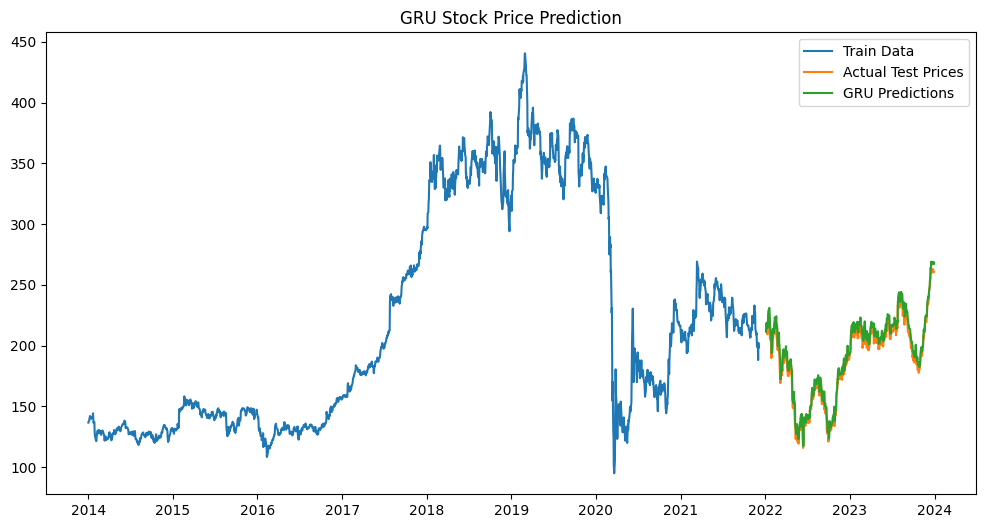

In [51]:
evaluate_model(model_gru, 'GRU')

## Conclusion
### By looking on the graphs above we cant really tell which model performed better as they all got very simillar results, but looking by the error values the best score got the GRU model, then LSTM and the worst simpleRNN. Changing parameters didnt really help, we got very simillar - slightly worse results.